In [2]:
# 导入相关包
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import *
from matplotlib.ticker import MultipleLocator
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
df_bank = pd.read_csv("./dataset/train_90.csv") # 读取文件
X=df_bank.iloc[:,2:-2]
y=df_bank['active_index']
X.head() #显示新的特征集

,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,F_10,...,F_26,F_27,F_28,F_29,F_30,F_31,F_32,F_33,F_34,F_35
0,-0.711,-0.696,-0.794,-0.727,-0.747,-0.792,1.539,2.433,-0.136,1.295,...,0.093,0.0,0.073,0.344,0.006,-0.446,-0.502,-0.456,-0.457,-0.830
1,-0.909,-0.903,-0.947,-0.844,-0.856,-0.908,-0.371,0.990,-0.935,0.479,...,0.098,0.0,0.055,0.298,0.007,-0.523,-0.558,-0.533,0.113,-0.887
2,-0.920,-0.925,-0.923,-0.852,-0.853,-0.915,-0.334,0.792,-0.532,0.334,...,0.086,0.0,0.067,0.324,0.006,-0.535,-0.564,-0.540,0.367,-1.021
3,-0.926,-0.931,-0.943,-0.837,-0.850,-0.907,-0.993,-0.006,-0.826,0.391,...,0.091,0.0,0.076,0.276,0.010,-0.534,-0.554,-0.521,0.550,-0.211
4,-0.750,-0.764,-0.818,-0.749,-0.764,-0.816,1.116,1.447,-0.547,0.939,...,0.099,0.0,0.079,0.328,0.008,-0.468,-0.500,-0.419,-0.236,0.644


In [4]:
# 数据集准备，将数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=1)

In [9]:
# 定义模型参数进行训练
params = {
    "n_estimators": 100,
    "max_depth": 6,
    "min_samples_split": 5,
    "learning_rate": 0.1,
}
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=6, min_samples_split=5)

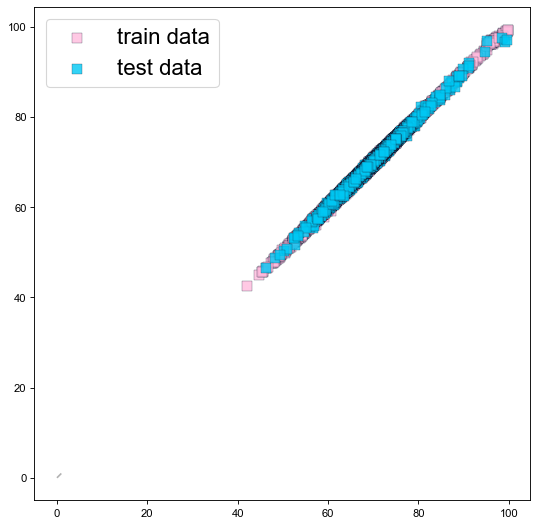

In [10]:
# 可视化训练集和测试集数据
ytrain_pre = reg.predict(X_train)
ytest_pre = reg.predict(X_test)

fig,ax = plt.subplots(figsize=(8, 8), dpi= 80)
plt.rcParams['font.sans-serif'] = ['Arial'] #字体均为 Arial
plt.rcParams['axes.unicode_minus']=False

scatter1 = plt.scatter(x=y_train, y=ytrain_pre, s=80, marker='s',c='#FFBCDE' , alpha=0.8, label='train data', linewidths=0.3, edgecolor='#17223b')
scatter2 = plt.scatter(x=y_test, y=ytest_pre,s=80, marker='s',c='#00C8F4' ,alpha=0.8, label='test data', linewidths=0.3, edgecolor='#17223b')
ax.plot([0,1],[0,1],'--',c='black',alpha=0.3)
plt.legend(loc='upper left',fontsize=20, frameon=True ,labelspacing=0.5)

D:\anaconda\envs\PyTorch\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)


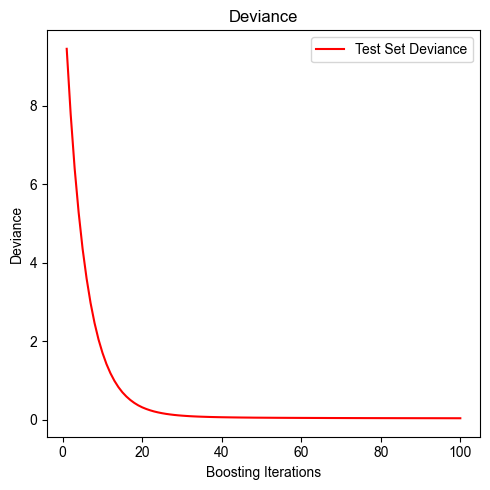

In [11]:
# 训练过程可视化
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(5, 5))
plt.subplot(1, 1, 1)
plt.title("Deviance")
# plt.plot(np.arange(params["n_estimators"]) + 1, reg.train_score_, "b-", label="Training Set Deviance", )
plt.plot(np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance")
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

In [12]:
# 计算MSE和拟合优度R^2
train_mse = mean_squared_error(y_train, reg.predict(X_train))
test_mse = mean_squared_error(y_test, reg.predict(X_test))
train_score = reg.score(X_train,y_train)
test_score = reg.score(X_test,y_test)
# print("The mean squared error (MSE) on train set: {:.4f}".format(train_mse))
print("The mean squared error (MSE) on test set: {:.4f}".format(test_mse))
# print("The R^2 on train set: {:.4f}".format(train_score))
print("The R^2 on test set: {:.4f}".format(test_score))

The mean squared error (MSE) on test set: 0.0337
The R^2 on test set: 0.9971
